# Files

## Excel

In [2]:
#install.packages("xlsx")
library(xlsx)

In [3]:
data <- read.xlsx("data/telecom_users.xlsx", sheetIndex = 1, endRow = 100)
head(data)

  customerID gender SeniorCitizen Partner Dependents tenure PhoneService
1 7010-BRBUU   Male             0     Yes        Yes     72          Yes
2 9688-YGXVR Female             0      No         No     44          Yes
3 9286-DOJGF Female             1     Yes         No     38          Yes
4 6994-KERXL   Male             0      No         No      4          Yes
5 2181-UAESM   Male             0      No         No      2          Yes
6 4312-GVYNH Female             0     Yes         No     70           No
     MultipleLines InternetService      OnlineSecurity        OnlineBackup
1              Yes              No No internet service No internet service
2               No     Fiber optic                  No                 Yes
3              Yes     Fiber optic                  No                  No
4               No             DSL                  No                  No
5               No             DSL                 Yes                  No
6 No phone service             DSL     

In [4]:
data <- data[data$Partner == "Yes", ]
head(data)

   customerID gender SeniorCitizen Partner Dependents tenure PhoneService
1  7010-BRBUU   Male             0     Yes        Yes     72          Yes
3  9286-DOJGF Female             1     Yes         No     38          Yes
6  4312-GVYNH Female             0     Yes         No     70           No
11 4578-PHJYZ   Male             0     Yes        Yes     52          Yes
12 2091-MJTFX Female             0     Yes        Yes     30           No
13 2277-DJJDL   Male             1     Yes         No     60          Yes
      MultipleLines InternetService      OnlineSecurity        OnlineBackup
1               Yes              No No internet service No internet service
3               Yes     Fiber optic                  No                  No
6  No phone service             DSL                 Yes                  No
11               No             DSL                  No                 Yes
12 No phone service             DSL                  No                  No
13              Yes     Fi

In [5]:
write.xlsx(data, file = "data/final_telecom_data.xlsx")

## XML

In [7]:
#install.packages(c("XML", "methods"))
library(XML)
library(methods)

In [8]:
xmldataframe <- xmlToDataFrame("data/employes.xml")
xmldataframe

  ID     NAME SALARY  STARTDATE       DEPT
1  1     Rick  623.3   1/1/2012         IT
2  2      Dan  515.2  9/23/2013 Operations
3  3 Michelle    611 11/15/2014         IT
4  4     Ryan    729  5/11/2014         HR
5  5     Gary 843.25  3/27/2015    Finance
6  6     Nina    578  5/21/2013         IT
7  7    Simon  632.8  7/30/2013 Operations
8  8     Guru  722.5  6/17/2014    Finance

## JSON + BINANCE API

In [9]:
#install.packages("jsonlite")
library(jsonlite)

In [10]:
market = 'BTCUSDT'
interval = '1h'
limit = 100

url <- paste0(url = "https://api.binance.com/api/v3/klines?symbol=", market ,"&interval=", interval,"&limit=", limit)
print(url) # complete request URL

[1] "https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=1h&limit=100"


In [11]:
data <- fromJSON(url) # get json and transform it to list()
data <- data[, 1:7] # let's left only 1:7 columns (from Open time to Close time)
head(data)

     [,1]            [,2]              [,3]              [,4]             
[1,] "1757134800000" "110876.12000000" "110876.13000000" "110687.69000000"
[2,] "1757138400000" "110714.00000000" "110817.11000000" "110714.00000000"
[3,] "1.757142e+12"  "110752.84000000" "110829.15000000" "110750.64000000"
[4,] "1757145600000" "110825.59000000" "110968.00000000" "110774.46000000"
[5,] "1757149200000" "110952.77000000" "110952.77000000" "110693.86000000"
[6,] "1757152800000" "110695.06000000" "110804.62000000" "110677.30000000"
     [,5]              [,6]           [,7]           
[1,] "110714.00000000" "151.66886000" "1757138399999"
[2,] "110752.83000000" "96.24087000"  "1757141999999"
[3,] "110825.60000000" "86.44213000"  "1757145599999"
[4,] "110952.76000000" "91.10955000"  "1757149199999"
[5,] "110695.06000000" "193.74674000" "1757152799999"
[6,] "110773.62000000" "157.49749000" "1757156399999"

In [12]:
data <- as.data.frame(data)
head(data)

             V1              V2              V3              V4              V5
1 1757134800000 110876.12000000 110876.13000000 110687.69000000 110714.00000000
2 1757138400000 110714.00000000 110817.11000000 110714.00000000 110752.83000000
3  1.757142e+12 110752.84000000 110829.15000000 110750.64000000 110825.60000000
4 1757145600000 110825.59000000 110968.00000000 110774.46000000 110952.76000000
5 1757149200000 110952.77000000 110952.77000000 110693.86000000 110695.06000000
6 1757152800000 110695.06000000 110804.62000000 110677.30000000 110773.62000000
            V6            V7
1 151.66886000 1757138399999
2  96.24087000 1757141999999
3  86.44213000 1757145599999
4  91.10955000 1757149199999
5 193.74674000 1757152799999
6 157.49749000 1757156399999

In [13]:
colnames(data) <- c("Open_time", "Open", "High", "Low", "Close", "Volume", "Close_time")
head(data)

      Open_time            Open            High             Low           Close
1 1757134800000 110876.12000000 110876.13000000 110687.69000000 110714.00000000
2 1757138400000 110714.00000000 110817.11000000 110714.00000000 110752.83000000
3  1.757142e+12 110752.84000000 110829.15000000 110750.64000000 110825.60000000
4 1757145600000 110825.59000000 110968.00000000 110774.46000000 110952.76000000
5 1757149200000 110952.77000000 110952.77000000 110693.86000000 110695.06000000
6 1757152800000 110695.06000000 110804.62000000 110677.30000000 110773.62000000
        Volume    Close_time
1 151.66886000 1757138399999
2  96.24087000 1757141999999
3  86.44213000 1757145599999
4  91.10955000 1757149199999
5 193.74674000 1757152799999
6 157.49749000 1757156399999

In [15]:
is.character(data[,1])

[1] TRUE

In [16]:
data <- as.data.frame(sapply(data, as.numeric))
head(data)

     Open_time     Open     High      Low    Close    Volume   Close_time
1 1.757135e+12 110876.1 110876.1 110687.7 110714.0 151.66886 1.757138e+12
2 1.757138e+12 110714.0 110817.1 110714.0 110752.8  96.24087 1.757142e+12
3 1.757142e+12 110752.8 110829.1 110750.6 110825.6  86.44213 1.757146e+12
4 1.757146e+12 110825.6 110968.0 110774.5 110952.8  91.10955 1.757149e+12
5 1.757149e+12 110952.8 110952.8 110693.9 110695.1 193.74674 1.757153e+12
6 1.757153e+12 110695.1 110804.6 110677.3 110773.6 157.49749 1.757156e+12

In [ ]:
data$Open_time <- as.POSIXct(data$Open_time/1e3, origin = '1970-01-01')
data$Close_time <- as.POSIXct(data$Close_time/1e3, origin = '1970-01-01')

: [1m[33mError[39m in `Ops.POSIXt()`:[22m
[33m![39m '/' not defined for "POSIXt" objects

In [20]:
tail(data)

              Open_time     Open     High      Low    Close    Volume
95  2025-09-10 06:00:00 111411.1 111586.3 111372.1 111545.9  263.9173
96  2025-09-10 07:00:00 111545.9 111647.4 111410.8 111520.4  304.1284
97  2025-09-10 08:00:00 111520.4 111729.6 111372.4 111577.3  436.9988
98  2025-09-10 09:00:00 111577.3 111969.6 111396.1 111792.3  503.8075
99  2025-09-10 10:00:00 111792.3 112602.4 111760.7 112553.6 1232.3239
100 2025-09-10 11:00:00 112553.6 112859.8 112438.1 112569.2  726.6379
             Close_time
95  2025-09-10 06:59:59
96  2025-09-10 07:59:59
97  2025-09-10 08:59:59
98  2025-09-10 09:59:59
99  2025-09-10 10:59:59
100 2025-09-10 11:59:59

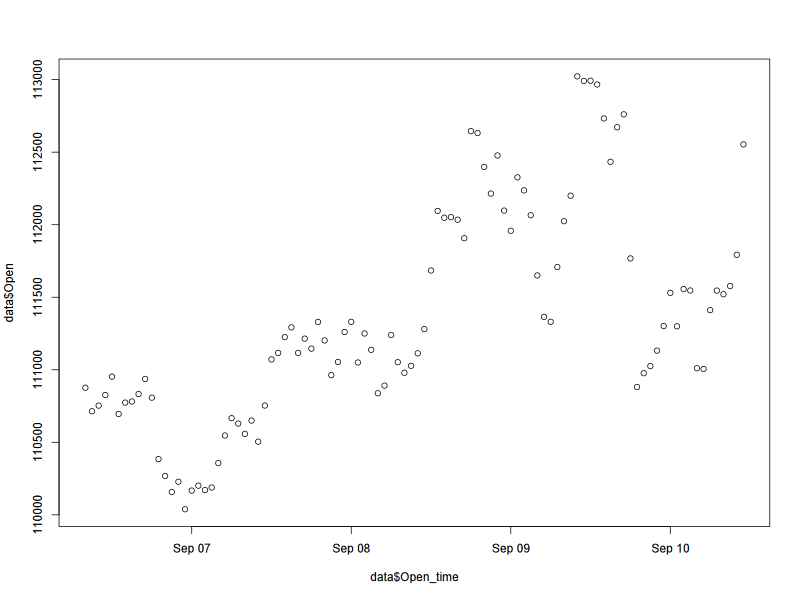

In [21]:
plot(data$Open_time, data$Open)

## Google Spreadsheets

In [2]:
#install.packages("googlesheets4")
library(googlesheets4)

data <- read_sheet("https://docs.google.com/spreadsheets/d/1U6Cf_qEOhiR9AZqTqS3mbMF3zt2db48ZP5v3rkrAEJY/edit#gid=780868077", sheet = 1)
gs4_deauth()

✔ Reading from gapminder.
✔ Range ''Africa''.


In [5]:
data[data$lifeExp < 35 & data$year > 1990, ]

# A tibble: 1 × 6
  country continent  year lifeExp     pop gdpPercap
  <chr>   <chr>     <dbl>   <dbl>   <dbl>     <dbl>
1 Rwanda  Africa     1992    23.6 7290203      737.